The Heart Disease Analysis project involves analysing a dataset related to heart disease to identify key factors that contribute to heart disease occurrence. The goal is to use data analytics techniques to predict the likelihood of heart disease based on various health indicators such as age, cholesterol levels, blood pressure, and other relevant features. The analysis aims to provide insights that can help in early diagnosis and prevention.

1.Data Cleaning: Handled missing data, outliers, and inconsistencies to ensure the dataset was suitable for analysis.


In [1]:
# importing required libraries like
import pandas as pd # to read the data set
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt #for data visualizations
import seaborn as sns # for data visualizations

In [2]:
#reading data set
df = pd.read_csv('/content/heartdisease.csv')

In [3]:
#checking top 5 rows values
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# checking null values sum in each column
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
#checking the data type of the each column and information of the data that present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# checking the summary of the data that present in the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2.Exploratory Data Analysis (EDA): Performed EDA to understand the distribution of data, relationships between variables.


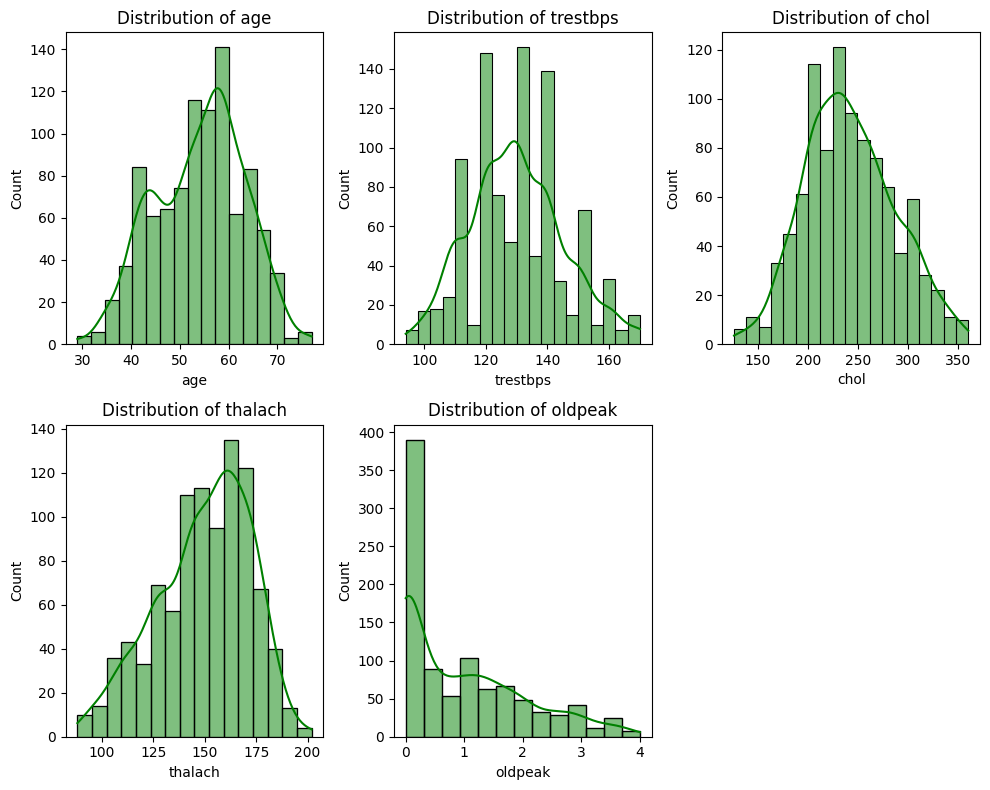

In [22]:
# Distribution plots for numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color = 'green')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

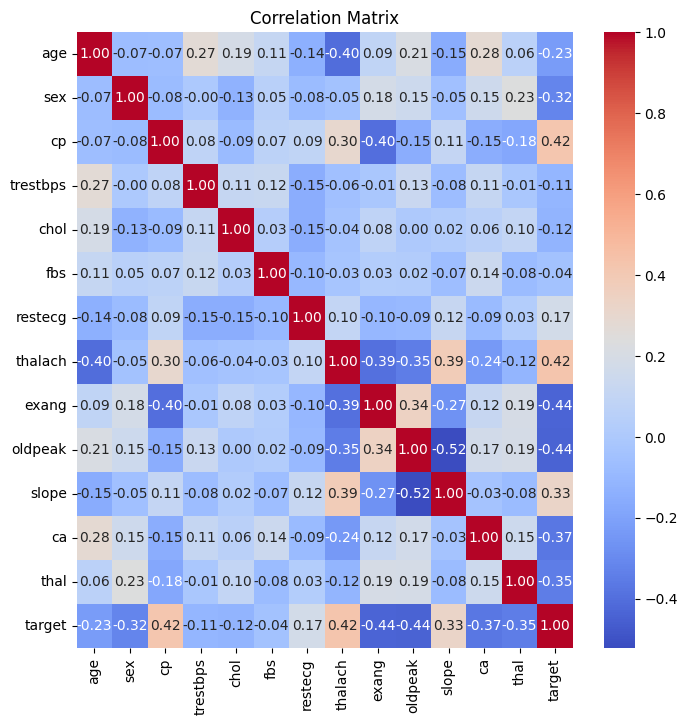

In [25]:
# Correlation heatmap to find relationships between variables
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
df.fillna(df.mean(), inplace=True)

removing outliers

In [14]:
columns_to_check = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



3.Question Formulation: Developed specific minimum 7 questions related to heart disease, and solve each question by using appropriate functions.

In [16]:
# 1. Average age of patients with heart disease
avg_age_hd = df[df['target'] == 1]['age'].mean()
print(f"Average age of patients with heart disease: {avg_age_hd}")

Average age of patients with heart disease: 52.08661417322835


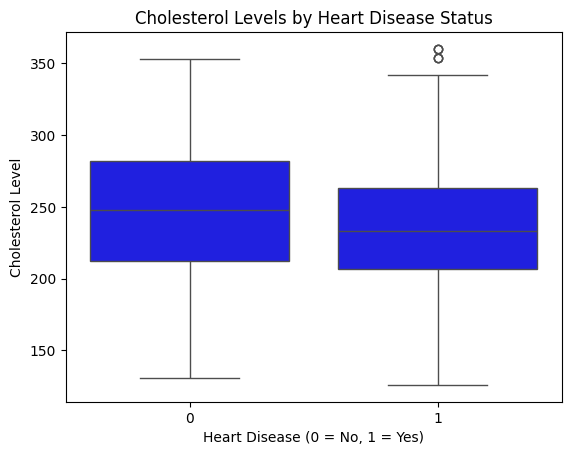

In [30]:
# 2. Relationship between cholesterol levels and heart disease
sns.boxplot(x='target', y='chol', data=df, color ='blue')
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()

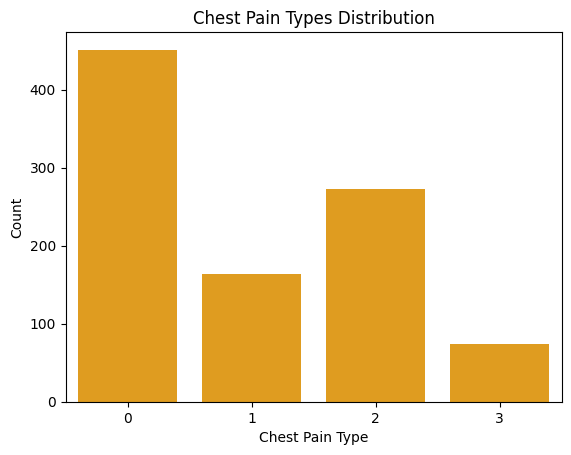

In [33]:
# 3. Distribution of chest pain types among patients
sns.countplot(x='cp', data=df,color = 'orange')
plt.title("Chest Pain Types Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

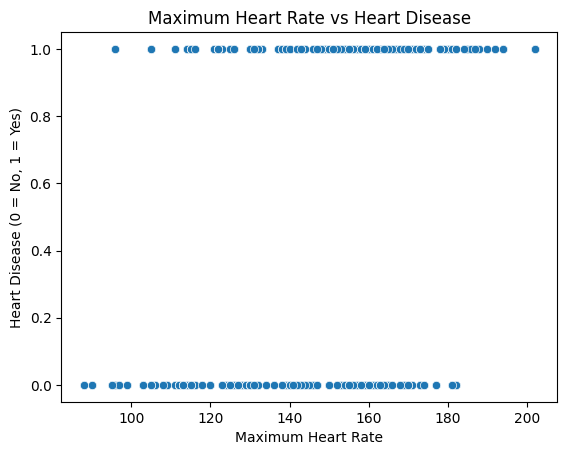

In [19]:
# 4. Correlation between maximum heart rate and heart disease
sns.scatterplot(x='thalach', y='target', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.show()

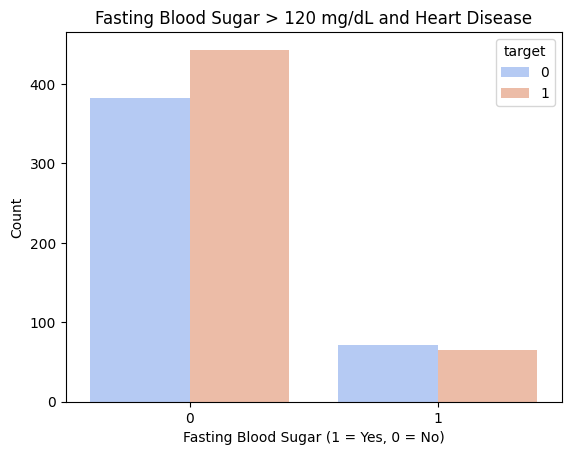

In [20]:
# 5.Fasting blood sugar > 120 mg/dL and heart disease
sns.countplot(x='fbs', hue='target', data=df, palette='coolwarm')
plt.title("Fasting Blood Sugar > 120 mg/dL and Heart Disease")
plt.xlabel("Fasting Blood Sugar (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


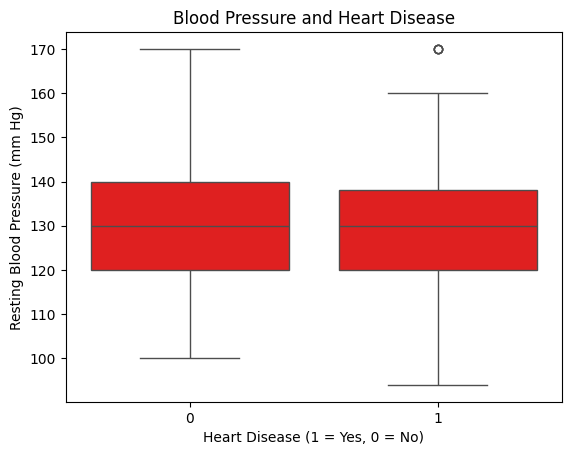

In [44]:
# 6.Blood pressure difference for patients with and without heart disease
sns.boxplot(x='target', y='trestbps', data=df,color ='red')
plt.title("Blood Pressure and Heart Disease")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.show()


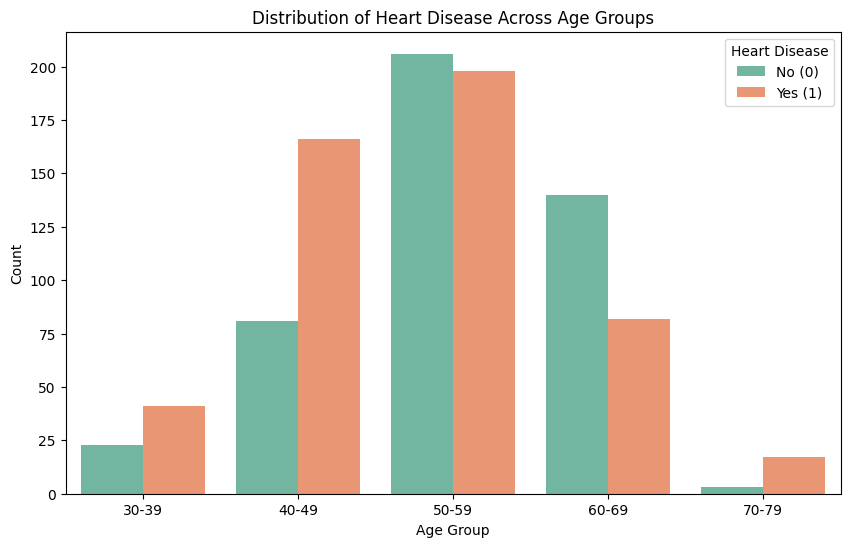

In [49]:
#What is the distribution of heart disease across age groups?
# Define age bins and labels
age_bins = [29, 40, 50, 60, 70, 80]  # Adjust these bins as needed based on your data range
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=df, palette='Set2')
plt.title("Distribution of Heart Disease Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

4.Data Visualization: Created visualizations using tools like Matplotlib, Seaborn, to effectively present the findings and insights gained from the analysis. This included charts, graphs, and other visual aids to make the results easy to understand.

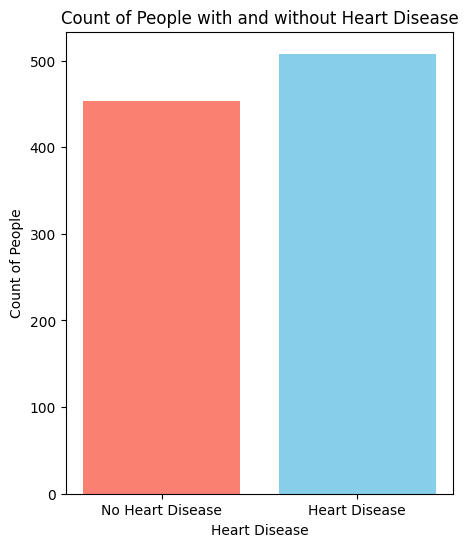

In [41]:
heart_disease_counts = df['target'].value_counts()

# Plot a bar chart
plt.figure(figsize=(5, 6))
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['skyblue', 'salmon'])

# Set labels and title
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel("Heart Disease")
plt.ylabel("Count of People")
plt.title("Count of People with and without Heart Disease")

# Display the plot
plt.show()

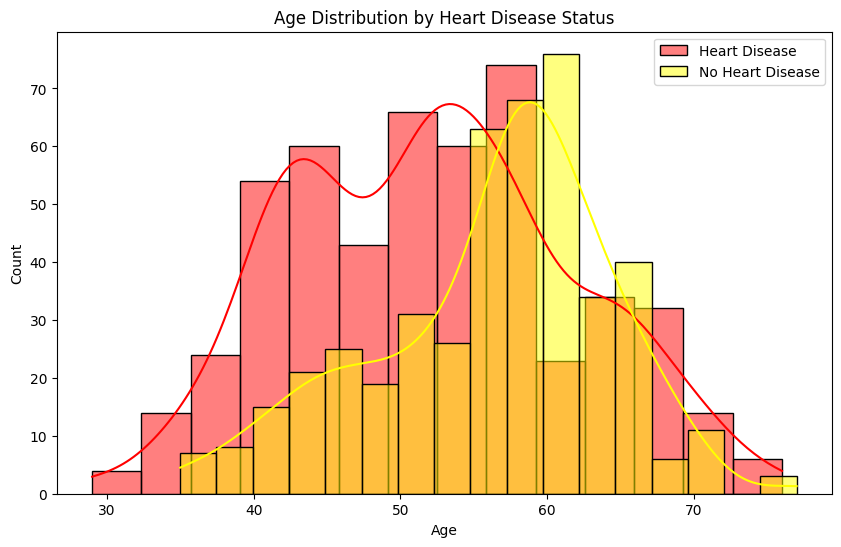

In [45]:
# Age distribution by heart disease status
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 1]['age'], color='red', label='Heart Disease', kde=True)
sns.histplot(df[df['target'] == 0]['age'], color='yellow', label='No Heart Disease', kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.legend()
plt.show()


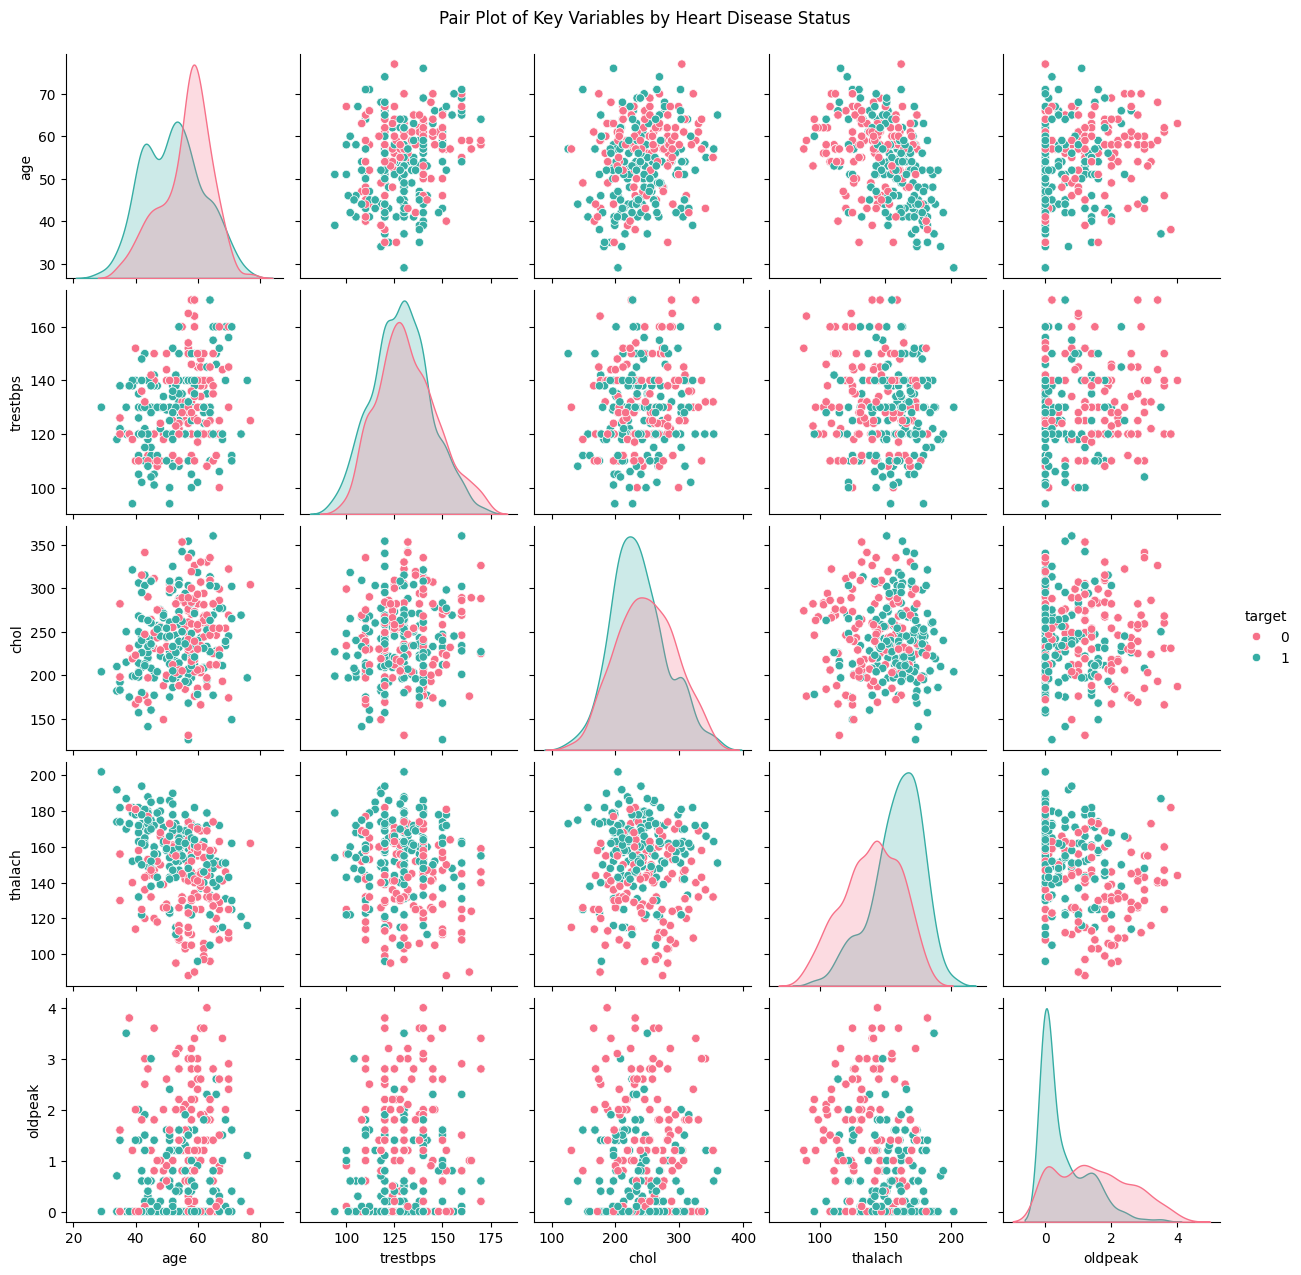

In [40]:
sns.pairplot(df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], palette='husl')
plt.suptitle("Pair Plot of Key Variables by Heart Disease Status", y=1.02)
plt.show()